# Transformada Discreta de Fourier 2D - Procesamiento de Video en Tiempo Real

La transformada discreta de Fourier permite realizar el análisis espectral de una señal. En el procesamiento de imágenes nos lleva al espacio de frecuencias, donde podemos obtener información sobre las componentes frecuenciales predominantes. El desarrollo de este módulo tendrá el siguiente orden:

1. Fundamentación 
2. Definición del filtro pasa bajas gaussiano
3. Definición del filtro pasa altas gaussiano
4. Procesamiento de video en tiempo real

## 1. Fundamentación

### Definición Transformada Discreta de Fourier 2D

<img src="assets/Definicion.jpg">

### Proceso de Filtrado Usando Espectros de Frecuencia

<img src="assets/FourierFiltros.jpg" width="800">

### Función Gaussiana Para Filtros

<img src="assets/EcuacionGaussiana.jpg" width="500">

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as fft

## 2. Definición del filtro pasa bajas gaussiano

<IPython.core.display.Javascript object>


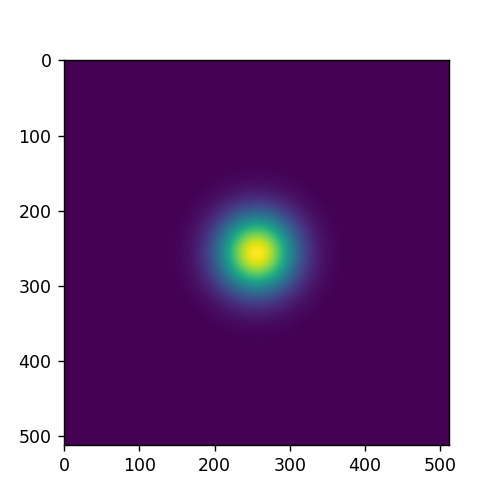

<IPython.core.display.Javascript object>


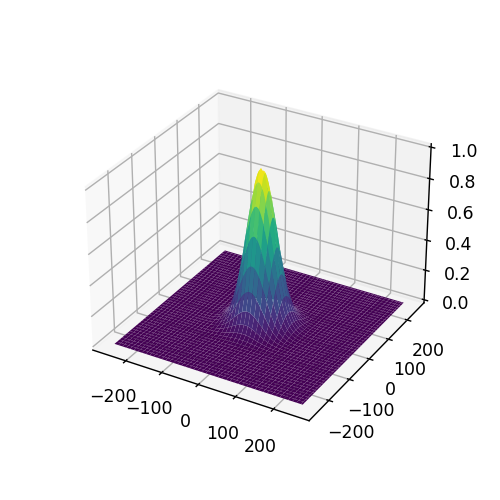

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

beta = 255
# Creamos un filtro pasa bajas gaussiano de dimensiones 512x512
F1=np.arange(-256,256,1)
F2=np.arange(-256,256,1)
[X,Y]=np.meshgrid(F1,F2)
R=np.sqrt(X**2+Y**2)
R=R/np.max(R)
sigma = 0.1

# Filtro pasa bajas con función gaussiana
Filt_Im = np.exp(-(R**2)/(2*sigma**2))


# Graficamos el filtro en 2D
fig = plt.figure(figsize=(4, 4))
plt.imshow(Filt_Im)
plt.show()

# Graficamos el filtro en 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Filt_Im,cmap=cm.viridis)
plt.show()

## 3. Definición del filtro pasa altas gaussiano

<IPython.core.display.Javascript object>


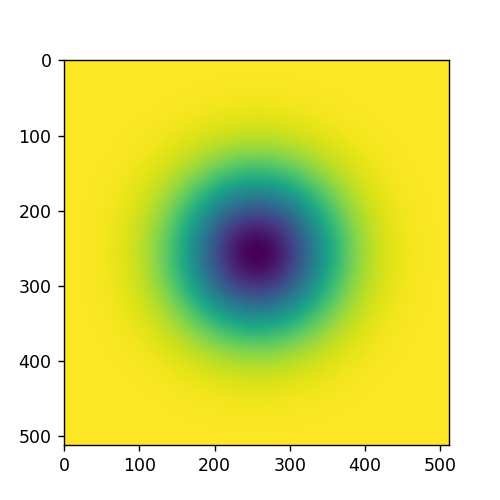

<IPython.core.display.Javascript object>


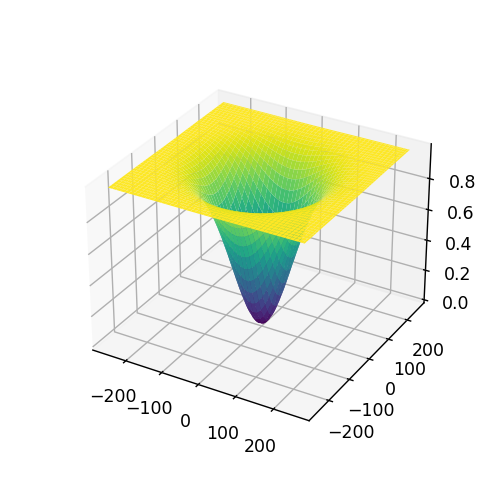

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

beta = 1

# Creamos un filtro pasa altas gaussiano de dimensiones 512x512
F1=np.arange(-256,256,1)
F2=np.arange(-256,256,1)
[X,Y]=np.meshgrid(F1,F2)
R=np.sqrt(X**2+Y**2)
R=R/np.max(R)
sigma = 0.2

# Filtro pasa altas con función gaussiana
Filt_Im = 1-np.exp(-(R**2)/(2*sigma**2))


# Graficamos el filtro en 2D

plt.figure(figsize = (4,4))
plt.imshow(Filt_Im)
plt.show()

# Graficamos el filtro en 3D
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Filt_Im,cmap=cm.viridis)
plt.show()

## 4. Procesamiento de video en tiempo real

In [4]:
import cv2

# Tomamos la referencia de la cámara
camera = cv2.VideoCapture(0)

while(True):
    # Leemos un frame de la cámara
    _, frame = camera.read()
    
    # Redimensionamos la imagen a 512x512
    image = cv2.resize(frame,(512,512))
    # Convertimos la imagen a escala de grises (Un plano de color)
    gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # Establecemos el tipo de dato de intensidad como float
    gray_f=np.float64(gray_image)

    # Calculamos la transformada discreta de fourier 2D
    Fimg=fft.fft2(gray_f)

    # Movemos el origen al centro de la imagen (bajas frecuencias)
    Fsh_Image=fft.fftshift(Fimg)

    # Aplicamos el filtro gaussiano al espectro de la imagen (Imagen x Máscara)
    FFt_filtered=Fsh_Image*Filt_Im

    # Recuperamos la imagen calculando la transformada inversa de fourier del espectro ya filtrado
    ImageFiltered = fft.ifft2(fft.ifftshift(FFt_filtered))

    # Normalizamos las imagenes para mostrarlas en pantalla
    Fsh_ImageN = cv2.normalize(abs(Fsh_Image), None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    FFt_filteredN = cv2.normalize(abs(FFt_filtered), None, alpha = 0, beta = beta, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    ImageFilteredN = cv2.normalize(abs(ImageFiltered), None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    
    # Mostramos las imagenes en pantalla
    cv2.imshow("Filtrada", ImageFilteredN)
    cv2.imshow("Camara", image)
    cv2.imshow("Espectro", Fsh_ImageN)
    cv2.imshow("Espectro Filtrado", FFt_filteredN)

    key = cv2.waitKey(1)

    # Salir de la captura de video si presionamos 'q'
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

In [ ]:
camera.release()